# Preparation
Import TensorFlow library and the [Boston housing dataset](https://keras.io/api/datasets/boston_housing/) by running the cells below. In this quest, we will be predicting house prices based on various features. For this purose, we will build a very basic neural network. In the later quests, you will build upon this framework and extend it with new methods, better suited for achieving better results with the current task as well as running more complex ones.

In [ ]:
import tensorflow as tf
boston_housing = tf.keras.datasets.boston_housing

# Tasks

From the dataset, extract training and testing features and labels.

In [ ]:
# your code
data = boston_housing.load_data(test_split=0.2)

57026/57026 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

y_train = np.reshape(y_train, (y_train.shape[0],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print('Shape of training data:    ', X_train.shape)
print('Shape of training labels:  ', y_train.shape)
print('Shape of test data:        ', X_test.shape)
print('Shape of test labels:      ', y_test.shape)

Shape of training data:     (404, 13)
Shape of training labels:   (404, 1)
Shape of test data:         (102, 13)
Shape of test labels:       (102, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build a very simple sequential model with three [dense](https://medium.com/datathings/dense-layers-explained-in-a-simple-way-62fe1db0ed75) layers - one input layer for the features, one hidden layer and one output layer for the price prediction. Equip the hidden layers with 64 neurons. How many nodes does the output layer need? An what activation function? Make the input and the hidden layer use [ReLu](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) as your activation function.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


def build_nn_model(num_input_features: int, hidden_dims: set[int], regularizer=None,
                   activation: str = 'relu', output_activation: str = 'linear',
                   outputs: int = 1):
  model = Sequential()

  model.add(Dense(units=hidden_dims[0], input_dim=num_input_features,
                  kernel_initializer='normal',
                  kernel_regularizer=regularizer, activation=activation))

  for i in range(1, len(hidden_dims)):
    model.add(Dense(units=hidden_dims[i],
                    kernel_initializer='normal',
                    kernel_regularizer=regularizer, activation=activation))

  model.add(Dense(units=outputs,
                  kernel_initializer='normal',
                  kernel_regularizer=regularizer,  activation=output_activation))

  return model

Print the model summary to get an overview of it in the cell below.

In [ ]:
num_input_features = X_train.shape[1]
hidden_dims1 = (64,)

In [ ]:
model = build_nn_model(num_input_features, hidden_dims1)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now, compile your model. For the sake of simplicity, use Mean Squared Error both as loss function and as metrics. For optimization, use [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20an%20optimization%20algorithm,iterative%20based%20in%20training%20data.&text=The%20algorithm%20is%20called%20Adam.).

In [ ]:
from tensorflow.keras.optimizers import Adam
# your code
model.compile(loss='mean_squared_error', optimizer='adam')

Fit the model on the train data. 1000 epochs should be more than enough.

In [ ]:
# your code
story = model.fit(X_train, y_train, epochs=1000, verbose=1, validation_split=0.25)

Epoch 1/1000
10/10 [==============================] - 9s 21ms/step - loss: 548.5562 - val_loss: 684.4276
Epoch 2/1000
10/10 [==============================] - 0s 6ms/step - loss: 542.9667 - val_loss: 677.1947
Epoch 3/1000
10/10 [==============================] - 0s 7ms/step - loss: 535.4691 - val_loss: 666.8958
Epoch 4/1000
10/10 [==============================] - 0s 7ms/step - loss: 524.7560 - val_loss: 652.8630
Epoch 5/1000
10/10 [==============================] - 0s 8ms/step - loss: 510.5411 - val_loss: 634.7459
Epoch 6/1000
10/10 [==============================] - 0s 5ms/step - loss: 492.6165 - val_loss: 612.4960
Epoch 7/1000
10/10 [==============================] - 0s 6ms/step - loss: 470.9055 - val_loss: 586.4348
Epoch 8/1000
10/10 [==============================] - 0s 6ms/step - loss: 446.1571 - val_loss: 556.6381
Epoch 9/1000
10/10 [==============================] - 0s 6ms/step - loss: 418.9015 - val_loss: 523.4754
Epoch 10/1000
10/10 [==============================] - 0s 5ms/s

Finally, evaluate your model on the test data and get the score.

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
  score_train = model.evaluate(X_train, y_train, verbose=0)
  score_test = model.evaluate(X_test, y_test, verbose=0)

  print(f'Test Loss (MSE), train {score_train}, test {score_test}')

In [ ]:
evaluate_model(model, X_train, X_test, y_train, y_test)

Test Loss (MSE), train 11.84058952331543, test 24.915634155273438


In [ ]:
story.history.keys()

dict_keys(['loss', 'val_loss'])

Further suggestions:

Plot the loss on the training AND validation set for each epoch

What does this tell you about your model?

Try out different hyperparameters, i.e. reduce the number of neurons in your hidden layers - or increase them, add more hidden layers, add some regularization, i.e. L2-regularization or dropout

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

def plot_metrics(story):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  ax1 = axes[0]

  loss_over_epoch_train = story.history['loss']
  sns.lineplot(loss_over_epoch_train, label='Loss on train data', ax=ax1)

  loss_over_epoch_test = story.history['val_loss']
  sns.lineplot(loss_over_epoch_test, label='Loss on validation data', ax=ax1)

  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')

  ax2 = axes[1]

  sns.lineplot(x=range(200, len(loss_over_epoch_train) + 1), y=loss_over_epoch_train[199:], label='Loss on train data', ax=ax2)
  sns.lineplot(x=range(200, len(loss_over_epoch_test) + 1), y=loss_over_epoch_test[199:], label='Loss on validation data', ax=ax2)

  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Loss starting from 200 epoch')

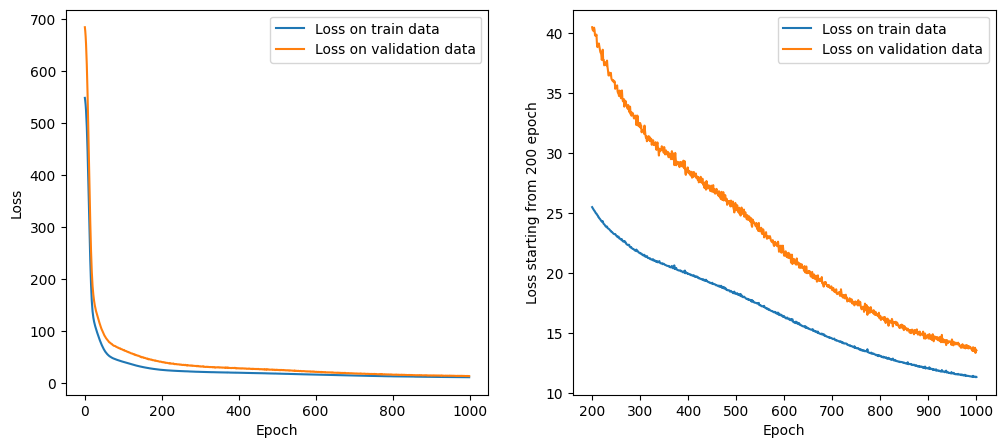

In [ ]:
plot_metrics(story)

In [ ]:
def train_model_and_get_story(num_input_features: int, hidden_dims: set[int], X_train, X_test, y_train, y_test, regularizer=None):
  model = build_nn_model(num_input_features, hidden_dims, regularizer)
  model.compile(loss='mean_squared_error', optimizer=Adam())

  story = model.fit(X_train, y_train, epochs=1000, verbose=0, validation_split=0.25)
  return model, story

### 5 hidden layers

In [ ]:
hidden_dims2 = (64, 64, 64, 64, 64)

model2, story2 = train_model_and_get_story(num_input_features, hidden_dims2, X_train, X_test, y_train, y_test)

Test Loss (MSE), train 5.108813762664795, test 12.991802215576172


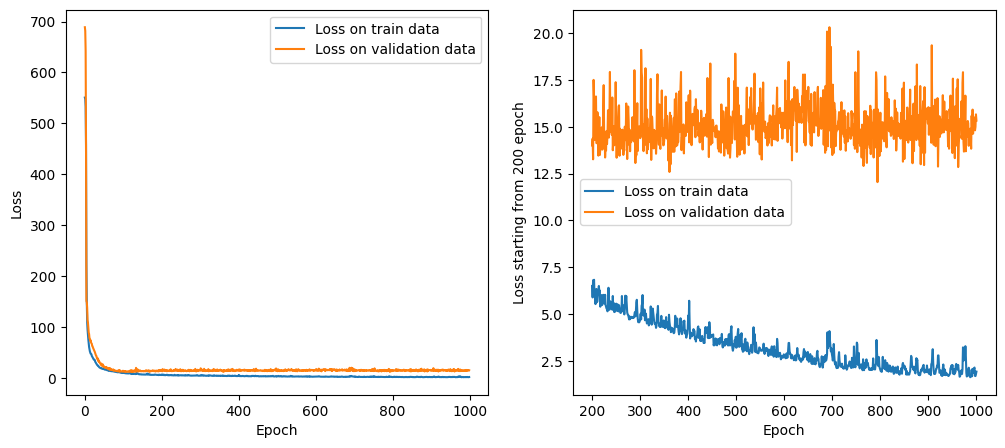

In [ ]:
plot_metrics(story2)
evaluate_model(model2, X_train, X_test, y_train, y_test)

### 1 hidden layer, 128 neurons

In [ ]:
model3, story3 = train_model_and_get_story(num_input_features, (128,), X_train, X_test, y_train, y_test)

Test Loss (MSE), train 10.07024097442627, test 26.304527282714844


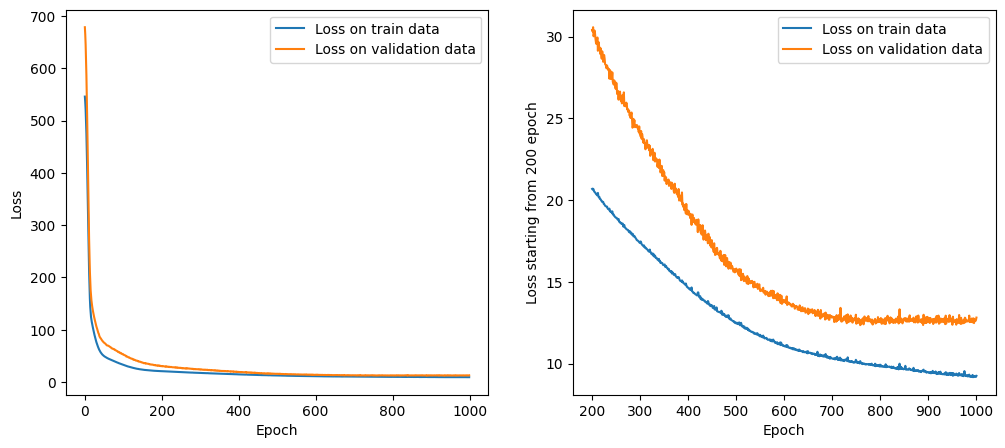

In [ ]:
plot_metrics(story3)
evaluate_model(model3, X_train, X_test, y_train, y_test)

### Using regularizer, 64 neurons, 1 hidden layer

In [ ]:
from tensorflow.keras import regularizers

regularizer1 = regularizers.l2(0.01)
model4, story4 = train_model_and_get_story(num_input_features, (64,), X_train, X_test, y_train, y_test, regularizer1)

Test Loss (MSE), train 13.151759147644043, test 26.6943359375


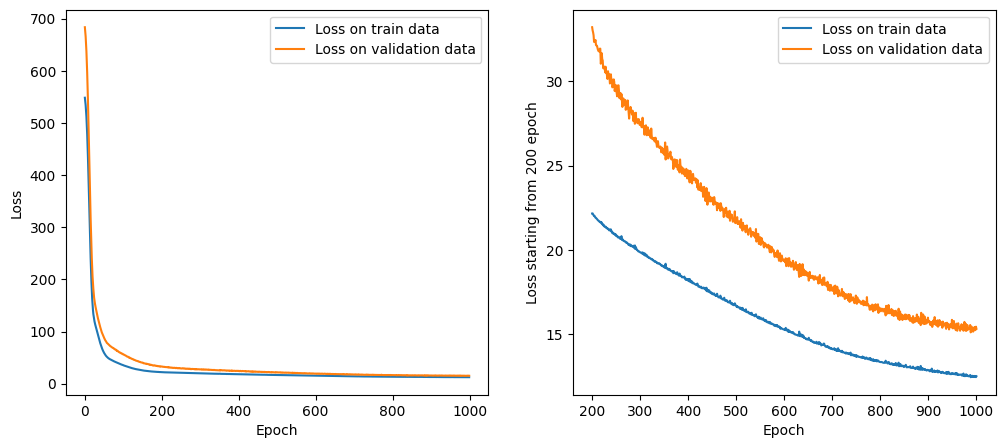

In [ ]:
plot_metrics(story4)
evaluate_model(model4, X_train, X_test, y_train, y_test)